http://www.stat.yale.edu/Courses/1997-98/101/linreg.htm

In [1]:
import pandas as pd

import numpy as np
import keras

from matplotlib import pyplot as plt

from keras.layers import Input, Dense
from keras.models import Model

from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer

%matplotlib inline

Using TensorFlow backend.


In [2]:
df = pd.read_csv("../television/data.csv")

In [3]:
df.head()

,Country,Life Expectancy,People per Television,People per Physician,Female Life Expectancy,Male Life Expectancy
0,Argentina,70.5,4,370,74,67
1,Bangladesh,53.5,315,6166,53,54
2,Brazil,65.0,4,684,68,62
3,Canada,76.5,1.7,449,80,73
4,China,70.0,8,643,72,68


In [4]:
df.columns,df.dtypes

(Index(['Country', 'Life Expectancy', 'People per Television',
        'People per Physician', 'Female Life Expectancy',
        'Male Life Expectancy'],
       dtype='object'), Country                    object
 Life Expectancy           float64
 People per Television      object
 People per Physician        int64
 Female Life Expectancy      int64
 Male Life Expectancy        int64
 dtype: object)

In [5]:
# df["People per Television"] = df["People per Television"].as_numeric
df["People per Television"] = pd.to_numeric(df["People per Television"],errors='coerce')

In [6]:
df = df.dropna()

In [7]:
df.head()

,Country,Life Expectancy,People per Television,People per Physician,Female Life Expectancy,Male Life Expectancy
0,Argentina,70.5,4.0,370,74,67
1,Bangladesh,53.5,315.0,6166,53,54
2,Brazil,65.0,4.0,684,68,62
3,Canada,76.5,1.7,449,80,73
4,China,70.0,8.0,643,72,68


In [8]:
# x = ppl/television
# y = ppl/doctor

x = df["People per Television"].values.reshape(-1,1).astype(np.float64)
y = df["People per Physician"].values.reshape(-1,1).astype(np.float64)

x.shape,y.shape

((38, 1), (38, 1))

Epoch 1/10
38/38 [==============================] - 0s - loss: 0.8160      
Epoch 2/10
38/38 [==============================] - 0s - loss: 0.7883     
Epoch 3/10
38/38 [==============================] - 0s - loss: 0.7916     
Epoch 4/10
38/38 [==============================] - 0s - loss: 0.7954     
Epoch 5/10
38/38 [==============================] - 0s - loss: 0.7973     
Epoch 6/10
38/38 [==============================] - 0s - loss: 0.7981     
Epoch 7/10
38/38 [==============================] - 0s - loss: 0.7985     
Epoch 8/10
38/38 [==============================] - 0s - loss: 0.7986     
Epoch 9/10
38/38 [==============================] - 0s - loss: 0.7987     
Epoch 10/10
38/38 [==============================] - 0s - loss: 0.7987     


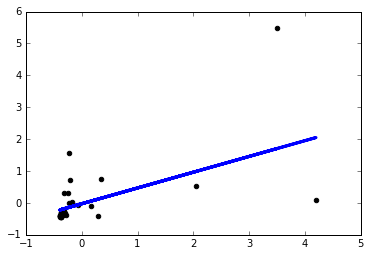

In [9]:
sc = StandardScaler()
x_ = sc.fit_transform(x)
y_ = sc.fit_transform(y)

inputs = Input(shape=(1,))
preds = Dense(1,activation='linear')(inputs)

model = Model(inputs=inputs,outputs=preds)
sgd=keras.optimizers.SGD()
model.compile(optimizer=sgd ,loss='mse')
model.fit(x_,y_, batch_size=1, verbose=1, epochs=10, shuffle=False)
plt.scatter(x_,y_,color='black')
plt.plot(x_,model.predict(x_), color='blue', linewidth=3)